In [2]:
%matplotlib inline
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
#sys._enablelegacywindowsfsencoding()
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('mode.chained_assignment', None)

In [3]:
path = "./data/train.csv"
df = pd.read_csv(path, index_col='id', parse_dates=['fecha'])

In [4]:
df.provincia.mode()

0    Distrito Federal
dtype: object

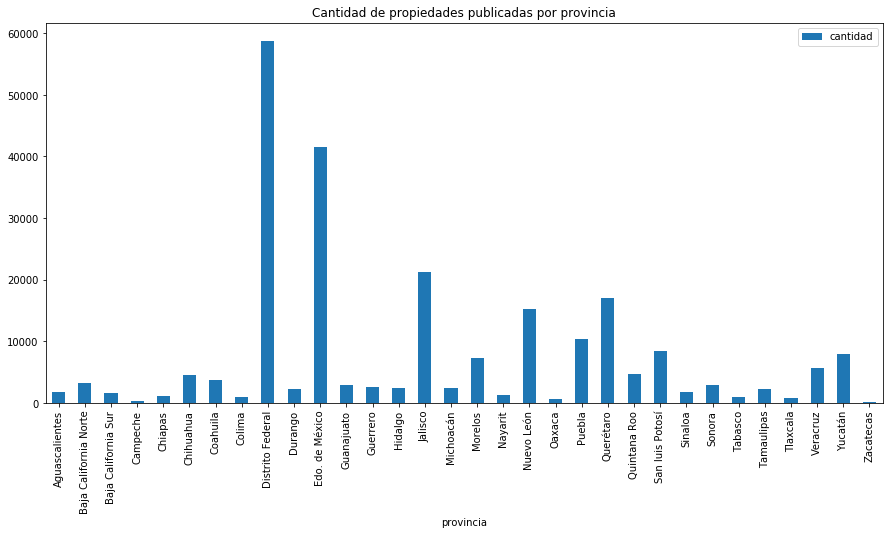

In [9]:
df["cantidad"] = 1
principales = df.groupby(["provincia"]).agg({"cantidad":sum}).plot(kind = "bar", figsize=(15,7), title='Cantidad de propiedades publicadas por provincia')

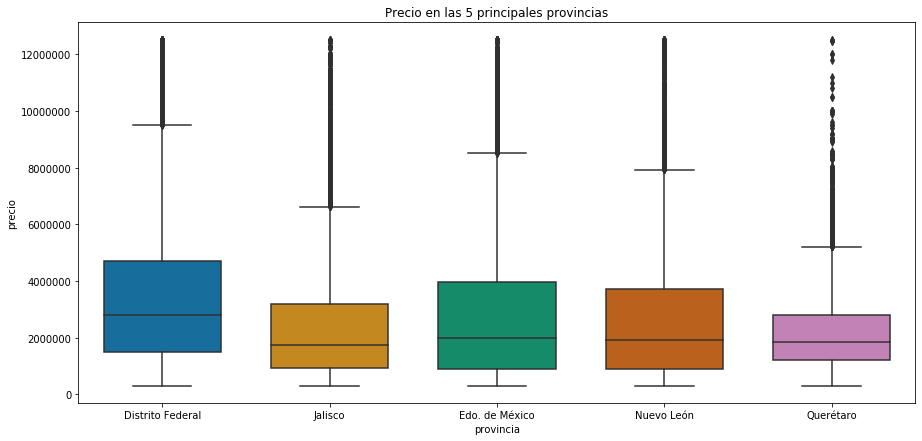

In [6]:
lista = df.groupby(["provincia"]).agg({"cantidad":sum}).sort_values("cantidad",ascending = False).head(5)
lista = lista.index.to_list()
principalesDF = df[df["provincia"].isin(lista)].copy()
principalesDF = principalesDF[['provincia','precio']]
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot = sns.boxplot(y='precio', x='provincia', data=principalesDF, width=0.7, palette="colorblind").set_title("Precio en las 5 principales provincias")

<Figure size 1080x504 with 0 Axes>

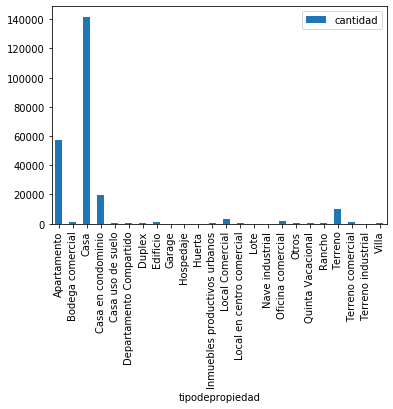

In [8]:
df.groupby('tipodepropiedad').agg({'cantidad':sum}).plot(kind='bar')

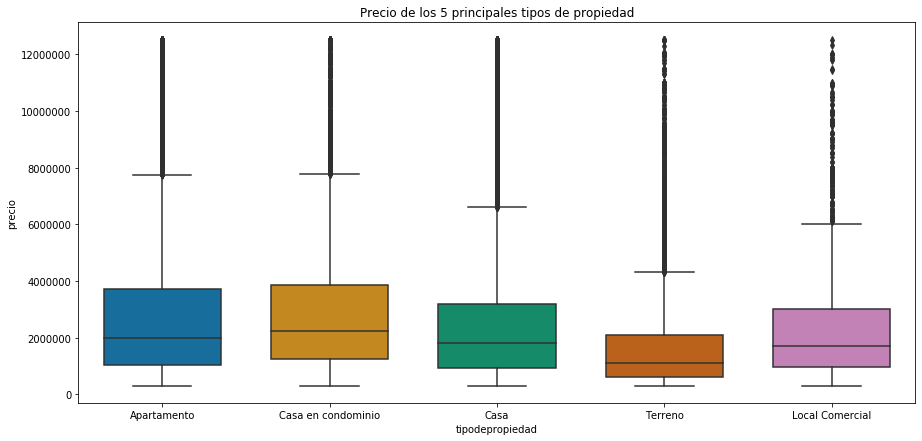

In [6]:
listaPrincipales = df.groupby("tipodepropiedad").agg({"cantidad":sum}).sort_values("cantidad", ascending=False).head(5).index.to_list()
principalesProp = df[df.tipodepropiedad.isin(listaPrincipales)] .copy()
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot2 = sns.boxplot(y='precio', x='tipodepropiedad', data=principalesProp, width=0.7, palette="colorblind").set_title("Precio de los 5 principales tipos de propiedad")

In [125]:
DF = df.loc[df.provincia == 'Distrito Federal'].copy()
DF = DF.loc[df.tipodepropiedad == 'Apartamento']
DF['anio'] = DF.fecha.dt.year
DF['cantidad'] = 1
DF = DF.groupby(['fecha']).agg({'precio':'mean', 'cantidad':sum}).reset_index()

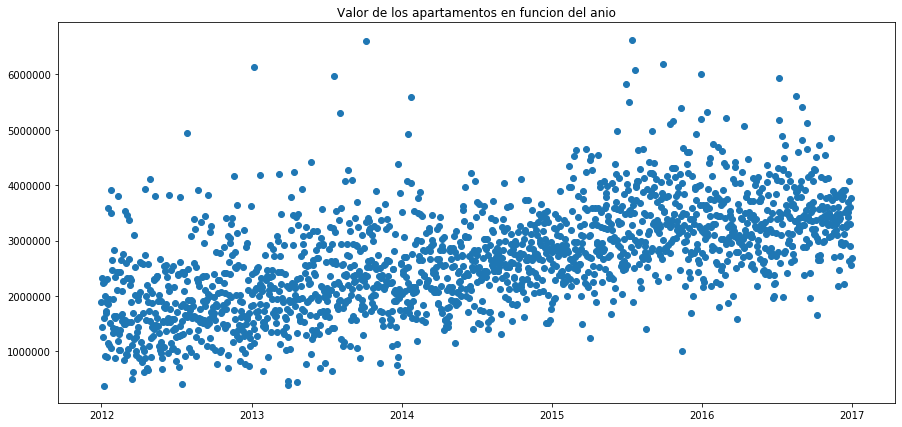

In [179]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
fig = plt.scatter(x=DF.fecha.tolist(), y=DF.precio)
plt.title('Valor de los apartamentos en funcion del anio')
plt.show()

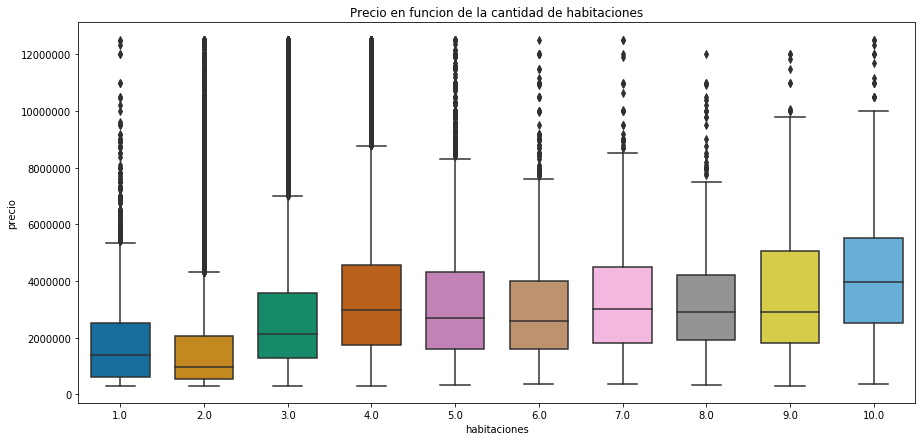

In [181]:
plt.figure(figsize=(15, 7))
plt.ticklabel_format(style='plain', axis='y')
bplot3 = sns.boxplot(y='precio', x='habitaciones', data=df, width=0.7, palette='colorblind').set_title('Precio en funcion de la cantidad de habitaciones')

In [161]:
df.columns

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'cantidad'],
      dtype='object')

Text(0.5, 1.0, 'Precio dependiendo de si tiene usos multiples o no')

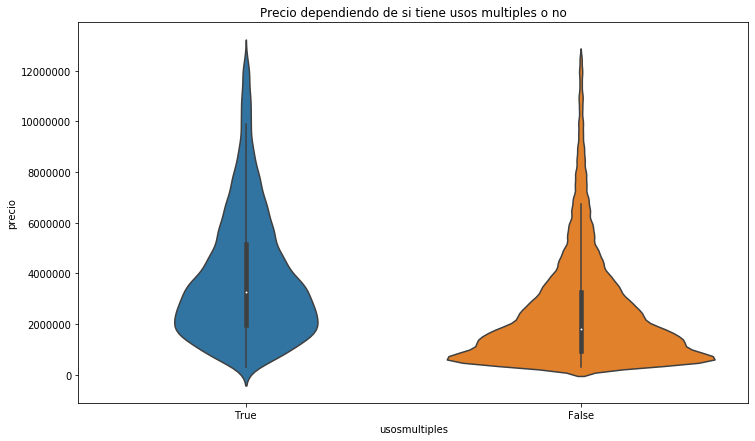

In [190]:
beneficios = df[['gimnasio','usosmultiples', 'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio']]
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='usosmultiples', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene usos multiples o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene gimnasio o no')

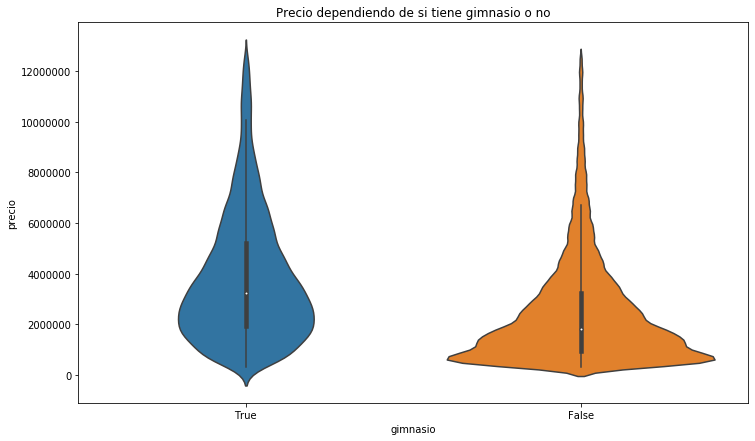

In [189]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='gimnasio', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene gimnasio o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene piscina o no')

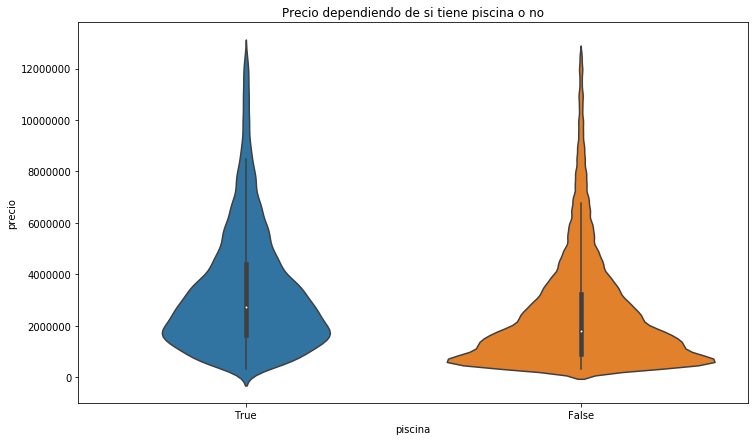

In [188]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='piscina', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene piscina o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene centros comerciales cercanos o no')

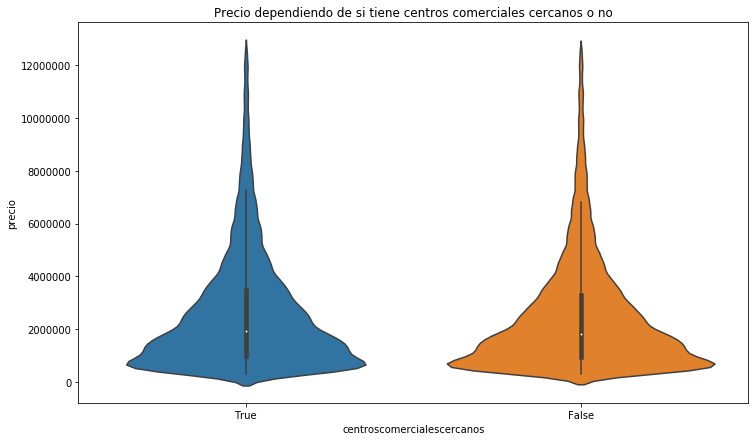

In [187]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='centroscomercialescercanos', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene centros comerciales cercanos o no")

Text(0.5, 1.0, 'Precio dependiendo de si tiene escuelas cercanas o no')

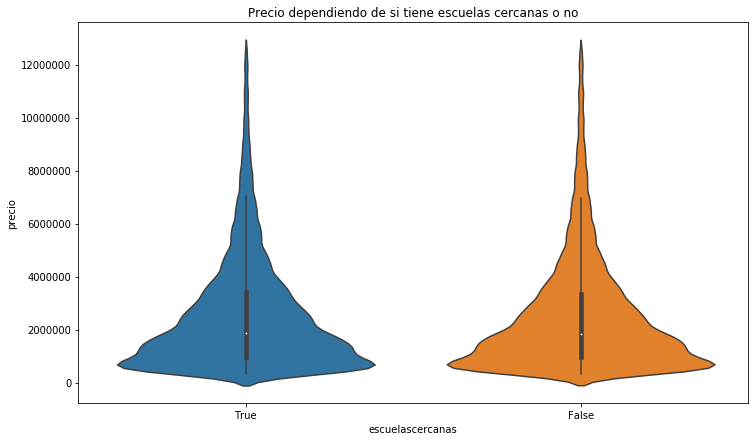

In [191]:
plt.figure(figsize=(12, 7))
plt.ticklabel_format(style='plain', axis='y')
sns.violinplot(x='escuelascercanas', y='precio', data=beneficios, order=[True, False]).set_title("Precio dependiendo de si tiene escuelas cercanas o no")